# Virat Kohli ODI Career Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
import requests
from bs4 import BeautifulSoup

url = "http://www.cricmetric.com/playerstats.py?player=V+Kohli&role=all&format=all&groupby=year"

response = requests.get(url)
html_content = response.content

soup = BeautifulSoup(html_content, 'html.parser')

table = soup.find('table')

# Read the table data into a pandas DataFrame
df = pd.read_html(str(table))[0]


In [5]:
df.to_csv('player_stats.csv', index=False)


In [7]:
df.head()

,Year,Innings,Runs,Balls,Outs,Avg,SR,HS,50,100,4s,6s,Dot %
0,2011,9,202,473,9,22.4,42.7,63,2,0,15,2,72.1
1,2012,16,689,1474,14,49.2,46.7,116,3,3,89,2,77.9
2,2013,12,616,1127,11,56.0,54.7,119,3,2,73,2,70.9
3,2014,20,847,1399,19,44.6,60.5,169,2,4,101,2,69.4
4,2015,15,640,1184,15,42.7,54.1,147,2,2,74,1,72.0


In [8]:
player_stats = df  # Assuming df contains the DataFrame with the table data
player_stats.head()

,Year,Innings,Runs,Balls,Outs,Avg,SR,HS,50,100,4s,6s,Dot %
0,2011,9,202,473,9,22.4,42.7,63,2,0,15,2,72.1
1,2012,16,689,1474,14,49.2,46.7,116,3,3,89,2,77.9
2,2013,12,616,1127,11,56.0,54.7,119,3,2,73,2,70.9
3,2014,20,847,1399,19,44.6,60.5,169,2,4,101,2,69.4
4,2015,15,640,1184,15,42.7,54.1,147,2,2,74,1,72.0


In [9]:
player_stats.shape

(15, 13)

In [10]:
player_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     15 non-null     object 
 1   Innings  15 non-null     int64  
 2   Runs     15 non-null     int64  
 3   Balls    15 non-null     int64  
 4   Outs     15 non-null     int64  
 5   Avg      15 non-null     float64
 6   SR       15 non-null     float64
 7   HS       15 non-null     int64  
 8   50       15 non-null     int64  
 9   100      15 non-null     int64  
 10  4s       15 non-null     int64  
 11  6s       15 non-null     int64  
 12  Dot %    15 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 1.6+ KB


In [11]:
player_stats.isnull().sum()

Year       0
Innings    0
Runs       0
Balls      0
Outs       0
Avg        0
SR         0
HS         0
50         0
100        0
4s         0
6s         0
Dot %      0
dtype: int64

In [32]:
player_stats['Balls'].unique()

array([  473,  1474,  1127,  1399,  1184,  2011,  1389,  2414,   967,
         283,  1216,   672,  1226,    70, 15905], dtype=int64)

### preprocessing

In [33]:
temp_df = player_stats[player_stats['Balls']!='-']
temp_df['Balls'] = temp_df['Balls'].astype(int)
temp_arr = temp_df.agg({'Balls':'sum','Runs':'sum'}).values

In [35]:
temp_arr


array([31810, 17658], dtype=int64)

In [36]:
avg_ball_per_run = temp_arr[0]/temp_arr[1]
avg_ball_per_run

1.801449767810624

In [37]:
#imputing process
player_stats['Runs'] = player_stats[['Runs','Balls']].apply(lambda x: int(x[1]*avg_ball_per_run) if x[0]=='-' else int(x[0]), axis=1)


In [38]:
player_stats.head(15)

,Year,Innings,Runs,Balls,Outs,Avg,SR,HS,50,100,4s,6s,Dot %
0,2011,9,202,473,9,22.4,42.7,63,2,0,15,2,72.1
1,2012,16,689,1474,14,49.2,46.7,116,3,3,89,2,77.9
2,2013,12,616,1127,11,56.0,54.7,119,3,2,73,2,70.9
3,2014,20,847,1399,19,44.6,60.5,169,2,4,101,2,69.4
4,2015,15,640,1184,15,42.7,54.1,147,2,2,74,1,72.0
5,2016,18,1215,2011,16,75.9,60.4,235,2,4,134,2,65.1
6,2017,16,1059,1389,14,75.6,76.2,243,1,5,98,6,54.2
7,2018,24,1307,2414,24,54.5,54.1,153,5,5,142,2,70.5
8,2019,11,608,967,9,67.6,62.9,254,2,2,78,3,68.4
9,2020,6,116,283,6,19.3,41.0,74,1,0,15,0,79.9


#### creating a boolean feature called not out


In [40]:
player_stats['Not Out'] = player_stats['Runs'].astype(str).apply(lambda x: 'Yes' if '*' in x else 'No')


In [41]:
player_stats.tail()

,Year,Innings,Runs,Balls,Outs,Avg,SR,HS,50,100,4s,6s,Dot %,Not Out
10,2021,19,536,1216,19,28.2,44.1,72,4,0,60,1,77.1,No
11,2022,11,265,672,10,26.5,39.4,79,1,0,33,1,79.2,No
12,2023,12,671,1226,12,55.9,54.7,186,2,2,70,1,68.6,No
13,2024,2,58,70,2,29.0,82.9,46,0,0,8,1,64.3,No
14,Total,191,8829,15905,180,49.0,55.5,254,30,29,990,26,69.9,No


In [42]:
player_stats['Not Out'].value_counts()

No    15
Name: Not Out, dtype: int64

In [45]:
player_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     15 non-null     object 
 1   Innings  15 non-null     int64  
 2   Runs     15 non-null     int64  
 3   Balls    15 non-null     int64  
 4   Outs     15 non-null     int64  
 5   Avg      15 non-null     float64
 6   SR       15 non-null     float64
 7   HS       15 non-null     int64  
 8   50       15 non-null     int64  
 9   100      15 non-null     int64  
 10  4s       15 non-null     int64  
 11  6s       15 non-null     int64  
 12  Dot %    15 non-null     float64
 13  Not Out  15 non-null     object 
dtypes: float64(3), int64(9), object(2)
memory usage: 1.8+ KB


In [50]:
player_stats['Runs'] = player_stats['Runs'].apply(lambda x: int(x[:-1]) if str(x).endswith('*') else int(x))


In [52]:
player_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     15 non-null     object 
 1   Innings  15 non-null     int64  
 2   Runs     15 non-null     int64  
 3   Balls    15 non-null     int64  
 4   Outs     15 non-null     int64  
 5   Avg      15 non-null     float64
 6   SR       15 non-null     float64
 7   HS       15 non-null     int64  
 8   50       15 non-null     int64  
 9   100      15 non-null     int64  
 10  4s       15 non-null     int64  
 11  6s       15 non-null     int64  
 12  Dot %    15 non-null     float64
 13  Not Out  15 non-null     object 
dtypes: float64(3), int64(9), object(2)
memory usage: 1.8+ KB


In [55]:
##converting year data column into datetime datatype
df['Year'] = pd.to_datetime(df['Year'], format='%Y', errors='coerce')


In [57]:
##creating quarter feature
# Convert 'Year' column to datetime format
player_stats['Year'] = pd.to_datetime(player_stats['Year'], format='%Y', errors='coerce')

# Extract quarter from the 'Year' column
player_stats['Quarter'] = player_stats['Year'].dt.quarter

In [58]:
player_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Year     14 non-null     datetime64[ns]
 1   Innings  15 non-null     int64         
 2   Runs     15 non-null     int64         
 3   Balls    15 non-null     int64         
 4   Outs     15 non-null     int64         
 5   Avg      15 non-null     float64       
 6   SR       15 non-null     float64       
 7   HS       15 non-null     int64         
 8   50       15 non-null     int64         
 9   100      15 non-null     int64         
 10  4s       15 non-null     int64         
 11  6s       15 non-null     int64         
 12  Dot %    15 non-null     float64       
 13  Not Out  15 non-null     object        
 14  Quarter  14 non-null     float64       
dtypes: datetime64[ns](1), float64(4), int64(9), object(1)
memory usage: 1.9+ KB


In [59]:
player_stats.head()

,Year,Innings,Runs,Balls,Outs,Avg,SR,HS,50,100,4s,6s,Dot %,Not Out,Quarter
0,2011-01-01,9,202,473,9,22.4,42.7,63,2,0,15,2,72.1,No,1.0
1,2012-01-01,16,689,1474,14,49.2,46.7,116,3,3,89,2,77.9,No,1.0
2,2013-01-01,12,616,1127,11,56.0,54.7,119,3,2,73,2,70.9,No,1.0
3,2014-01-01,20,847,1399,19,44.6,60.5,169,2,4,101,2,69.4,No,1.0
4,2015-01-01,15,640,1184,15,42.7,54.1,147,2,2,74,1,72.0,No,1.0


In [60]:
player_stats.tail()

,Year,Innings,Runs,Balls,Outs,Avg,SR,HS,50,100,4s,6s,Dot %,Not Out,Quarter
10,2021-01-01,19,536,1216,19,28.2,44.1,72,4,0,60,1,77.1,No,1.0
11,2022-01-01,11,265,672,10,26.5,39.4,79,1,0,33,1,79.2,No,1.0
12,2023-01-01,12,671,1226,12,55.9,54.7,186,2,2,70,1,68.6,No,1.0
13,2024-01-01,2,58,70,2,29.0,82.9,46,0,0,8,1,64.3,No,1.0
14,NaT,191,8829,15905,180,49.0,55.5,254,30,29,990,26,69.9,No,NaN


## Getting info

Finding against which year have highest batting avg?

In [61]:
highest_avg_year = player_stats.loc[player_stats['Avg'].idxmax()]['Year']
highest_avg = player_stats['Avg'].max()

print(f"The year with the highest batting average is {highest_avg_year} with an average of {highest_avg:.2f}")

The year with the highest batting average is 2016-01-01 00:00:00 with an average of 75.90


## Plotting a histogram

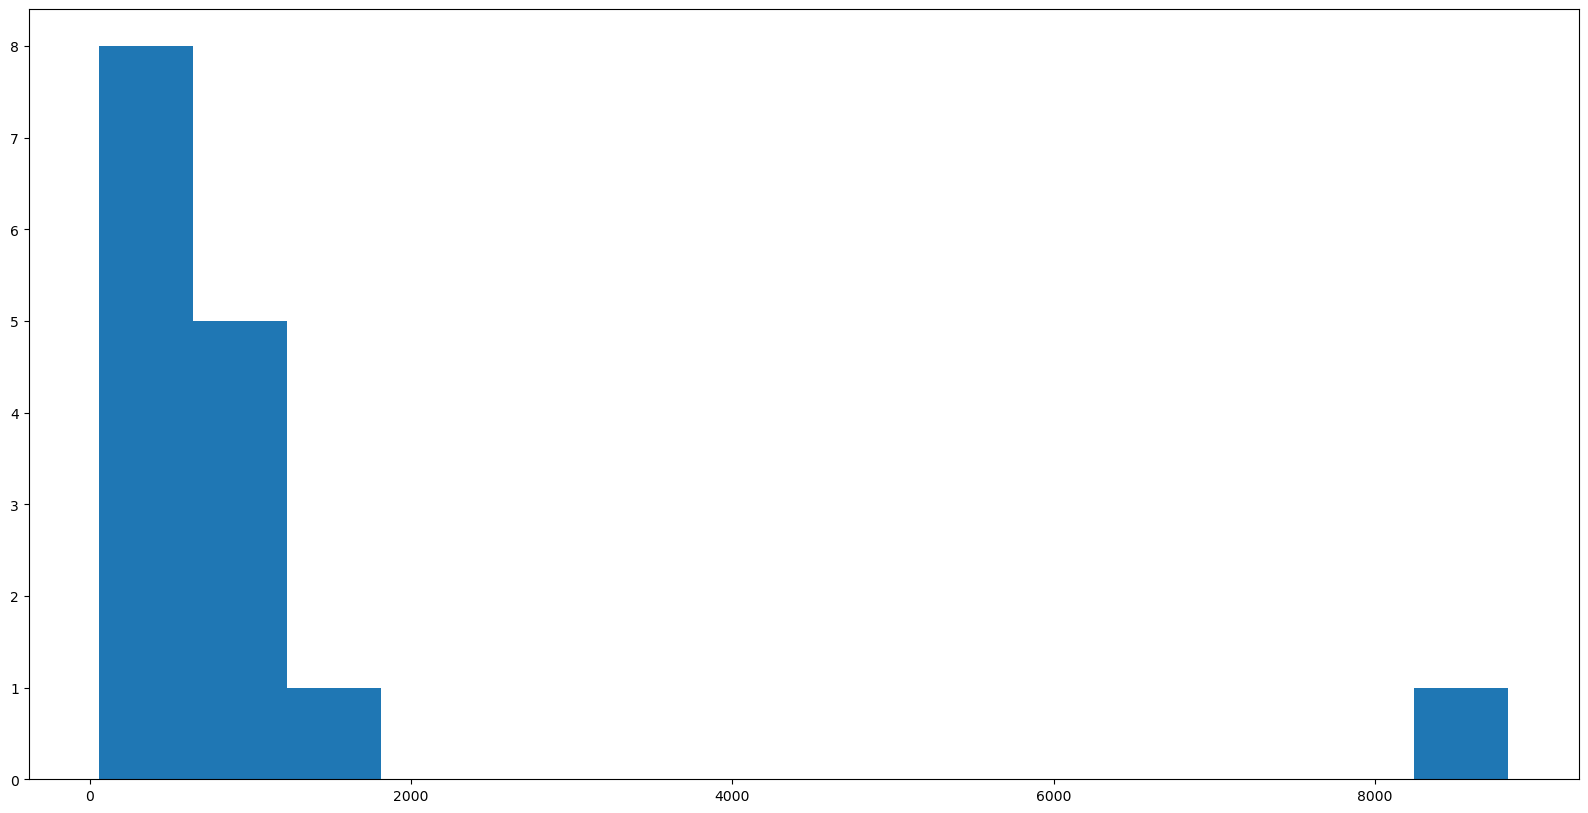

In [68]:
runs = player_stats['Runs']
plt.figure(figsize=(20,10))
plt.hist(runs,bins=15)
plt.show()

In [72]:
player_stats[player_stats['Year']==2021]

,Year,Innings,Runs,Balls,Outs,Avg,SR,HS,50,100,4s,6s,Dot %,Not Out,Quarter


whenever virat score 90-100 .what has been the avg the strike rate?

In [78]:

avg_list = []
for i in player_stats.index:
    row = player_stats.loc[i]
    runs = row['Runs']
    if runs >= 90 and runs < 100:
        avg_list.append(float(row['SR']))

# Check if the list is not empty before calculating the average
if len(avg_list) > 0:
    avg_sr =(avg_list) / len(avg_list)
    print(f"The average strike rate for scores between 90 and 100 runs is: {avg_sr:.2f}")
else:
    print("No qualifying scores found for calculating the average strike rate.")

No qualifying scores found for calculating the average strike rate.


In [79]:
runs = player_stats['Runs']
group_bin = [i//10 for i in runs]
player_stats['Group_Size'] = group_bin
df1 = player_stats.groupby('Group_Size').sum().reset_index()
df1.head()

,Group_Size,Innings,Runs,Balls,Outs,Avg,SR,HS,50,100,4s,6s,Dot %,Quarter
0,5,2,58,70,2,29.0,82.9,46,0,0,8,1,64.3,1.0
1,11,6,116,283,6,19.3,41.0,74,1,0,15,0,79.9,1.0
2,20,9,202,473,9,22.4,42.7,63,2,0,15,2,72.1,1.0
3,26,11,265,672,10,26.5,39.4,79,1,0,33,1,79.2,1.0
4,53,19,536,1216,19,28.2,44.1,72,4,0,60,1,77.1,1.0


In [82]:
max_six = 0
for i in df1.index:
    row = (df1.iloc[i])
    six_run = row['6s']
    if max_six<six_run:
        max_six = six_run
        max_four = row['4s']
        group_int = row['Group_Size']
        
max_six,max_four,group_int

(26.0, 990.0, 882.0)

In [84]:
group_bin

[20, 68, 61, 84, 64, 121, 105, 130, 60, 11, 53, 26, 67, 5, 882]

In [85]:
player_stats.head(15)

,Year,Innings,Runs,Balls,Outs,Avg,SR,HS,50,100,4s,6s,Dot %,Not Out,Quarter,Group_Size
0,2011-01-01,9,202,473,9,22.4,42.7,63,2,0,15,2,72.1,No,1.0,20
1,2012-01-01,16,689,1474,14,49.2,46.7,116,3,3,89,2,77.9,No,1.0,68
2,2013-01-01,12,616,1127,11,56.0,54.7,119,3,2,73,2,70.9,No,1.0,61
3,2014-01-01,20,847,1399,19,44.6,60.5,169,2,4,101,2,69.4,No,1.0,84
4,2015-01-01,15,640,1184,15,42.7,54.1,147,2,2,74,1,72.0,No,1.0,64
5,2016-01-01,18,1215,2011,16,75.9,60.4,235,2,4,134,2,65.1,No,1.0,121
6,2017-01-01,16,1059,1389,14,75.6,76.2,243,1,5,98,6,54.2,No,1.0,105
7,2018-01-01,24,1307,2414,24,54.5,54.1,153,5,5,142,2,70.5,No,1.0,130
8,2019-01-01,11,608,967,9,67.6,62.9,254,2,2,78,3,68.4,No,1.0,60
9,2020-01-01,6,116,283,6,19.3,41.0,74,1,0,15,0,79.9,No,1.0,11
